### Will create Suppl. figure of regional runoff / prcp

In [1]:
# updated script version for flattening gfdl-esm2m overshoot stabilisation scenarios from university of Bern 
from oggm import utils
import json
import oggm
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# get the correct colors for the different scenarios
from analysis_func import color_scenario, label_scenario,color_scenario_poster, d_reg_num_name

palette = sns.color_palette(color_scenario.values())

# get the dataset where coordinates of glaciers are stored
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
#frgi = '/home/users/lschuster/glacierMIP/rgi62_stats.h5'
odf = pd.read_hdf(frgi, index_col=0)
odf['coords'] = [(lon,lat) for lon,lat in zip(odf['CenLon'],odf['CenLat'])]

In [2]:
pd_clim_all= pd.read_csv('../annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', 
                         index_col=['Unnamed: 0'])
color_scenario_all_oversh = {'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844),
                             'oversh_T20OS15': (0.33725490196078434,
  0.7058823529411765,
  0.9137254901960784),
 'oversh_T25OS15': (0.8705882352941177,
  0.5607843137254902,
  0.0196078431372549),
 'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0)}


df_scenario = xr.open_dataset(f'common_running_sum_all_rgi_reg_oversh_stab_2000_2500_bc_1980_2019.nc')
bc = 'bc_1980_2019' # 'bc_2000_2019' #x #


In [3]:
num_dict = {0:'a', 1:'b', 2:'c', 3:'d', 4: 'e',
            5:'f', 6:'g', 7:'h', 8:'i', 9:'j',
            10:'k', 11:'l', 12:'m'} 

## Newest approach

In [21]:
color_scenario_poster = {'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844),
                         'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0),
}
scenario_ls = {'stab_T12': '-',
 'stab_T15': '-',
 'oversh_T30OS15': '--',
 'stab_T30': '-'}
stabs = ['stab_T12', 'stab_T15', 'stab_T30']
stabs_col = [color_scenario_poster['stab_T12'], color_scenario_poster['stab_T15'] , color_scenario_poster['stab_T30']]
label_scenario_david = {'stab_T12': '1.2°C Stabilisation',
 'oversh_T30OS15': r'3.0$\rightarrow$1.5°C Overshoot',
 'stab_T15': r'1.5°C Stabilisation',
 'stab_T30': r'3.0°C Stabilisation'}
scenarios = ['stab_T15', 'stab_T30','oversh_T30OS15']

In [22]:
df_scenario['runoff_51_yr_avg'] =df_scenario.isel(time=slice(0,-1)).runoff.rolling(min_periods=51,time=51, center=True).mean()
pd_runoff_scenario_rel_reg = (100*df_scenario/df_scenario.sel(time=2025)).runoff_51_yr_avg.to_dataframe('runoff_rel_2000_2050_%').reset_index()


In [23]:
rgi_reg='13'
j = 1

In [26]:
pd_runoff_scenario_rel_reg_sel

,bias_correction,rgi_reg,scenario,gcm,time,hydro_month,calendar_month,OGGM_version,runoff_rel_2000_2050_%
48000,bc_1980_2019,13,oversh_T20OS15,GFDL-ESM2M,2000.0,4,1,OGGM_v161_gdirs_2023.3,NaN
48001,bc_1980_2019,13,oversh_T20OS15,GFDL-ESM2M,2001.0,4,1,OGGM_v161_gdirs_2023.3,NaN
48002,bc_1980_2019,13,oversh_T20OS15,GFDL-ESM2M,2002.0,4,1,OGGM_v161_gdirs_2023.3,NaN
48003,bc_1980_2019,13,oversh_T20OS15,GFDL-ESM2M,2003.0,4,1,OGGM_v161_gdirs_2023.3,NaN
48004,bc_1980_2019,13,oversh_T20OS15,GFDL-ESM2M,2004.0,4,1,OGGM_v161_gdirs_2023.3,NaN
...,...,...,...,...,...,...,...,...,...
51995,bc_1980_2019,13,stab_T30,GFDL-ESM2M,2495.0,4,1,OGGM_v161_gdirs_2023.3,NaN
51996,bc_1980_2019,13,stab_T30,GFDL-ESM2M,2496.0,4,1,OGGM_v161_gdirs_2023.3,NaN
51997,bc_1980_2019,13,stab_T30,GFDL-ESM2M,2497.0,4,1,OGGM_v161_gdirs_2023.3,NaN
51998,bc_1980_2019,13,stab_T30,GFDL-ESM2M,2498.0,4,1,OGGM_v161_gdirs_2023.3,NaN


In [34]:
# some basin climate data
pd_clim_all = pd.read_csv('../annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', index_col = 'Unnamed: 0')
pd_clim_all['precip_51yr_avg'] = pd_clim_all['precip'].rolling(51,center=True, min_periods=51).mean()
pd_clim_all['precip_51yr_avg'] = pd_clim_all['precip_51yr_avg'].where((pd_clim_all.year>=2025) & (pd_clim_all.year<=2474))

In [36]:
pd_clim_all.region.unique()

array(['global', 'global_glacier', 'RGI01_glacier', 'RGI02_glacier',
       'RGI03_glacier', 'RGI04_glacier', 'RGI05_glacier', 'RGI06_glacier',
       'RGI07_glacier', 'RGI08_glacier', 'RGI09_glacier', 'RGI10_glacier',
       'RGI11_glacier', 'RGI12_glacier', 'RGI13_glacier', 'RGI14_glacier',
       'RGI15_glacier', 'RGI16_glacier', 'RGI17_glacier', 'RGI18_glacier',
       'RGI19_glacier', 'basin_2103_glacier', 'basin_2108_glacier',
       'basin_2302_glacier', 'basin_2306_glacier', 'basin_2309_glacier',
       'basin_2310_glacier', 'basin_2319_glacier', 'basin_2413_glacier',
       'basin_2421_glacier', 'basin_2433_glacier', 'basin_2434_glacier',
       'basin_2902_glacier', 'basin_2905_glacier', 'basin_2909_glacier',
       'basin_2910_glacier', 'basin_2913_glacier', 'basin_2914_glacier',
       'basin_2918_glacier', 'basin_2919_glacier', 'basin_3203_glacier',
       'basin_3209_glacier', 'basin_3212_glacier', 'basin_3227_glacier',
       'basin_3232_glacier', 'basin_3244_glacier', '

In [59]:
#### both functions copied from notebook: 3_basin_stats.ipynb    ####
# function to correctly find the largest continuous span of years in a list
def find_largest_continuous_span(years):
    max_span_start = years[0]
    max_span_end = years[0]
    current_span_start = years[0]
    current_span_end = years[0]

    for i in range(1, len(years)):
        if years[i] == current_span_end + 1:
            current_span_end = years[i]
        else:
            if (current_span_end - current_span_start) > (max_span_end - max_span_start):
                max_span_start = current_span_start
                max_span_end = current_span_end
            current_span_start = years[i]
            current_span_end = years[i]

        if (current_span_end - current_span_start) > (max_span_end - max_span_start):
            max_span_start = current_span_start
            max_span_end = current_span_end

    return (max_span_start, max_span_end)

def get_basin_trough_water_stats(sel_stab, sel_oversh, 
                                 runoff_var = 'runoff_dry3m_rel_2000_2050_%'):

    # “Trough water” occurs if the 51-year average annual runoff from the 
    # “Overshoot 3.0°C -> 1.5°C” scenario is at least 5\% smaller than (i) in the “Stabilisation 1.5°C” scenario for 20 years 
    # and  (ii) than in the baseline period 
    # (initial steady state for the idealised experiments, 2000--2020 or 2000--2050 climate for the projections with the ESM).
    # --> the second condition just means it has to be smaller than or equal to 95% 
    
    # arguments: 
    # sel_stab, sel_oversh: (pd.DataFrame)
    #    Table with runoff_var of the stabilisation or overshoot scenario for a specific basin 
    # runoff_var: str
    #    one of the three runoff variables ('runoff_rel_2000_2050_%', 'melt_off_on_rel_2000_2050_%', 'runoff_dry3m_rel_2000_2050_%')

    # returns array with: 
    # - amount of trough water years (also if they are non-continuous)
    # - cumulative runoff difference during trough water years
    # - year where trough water is strongest (year w. largest difference)
    # - largest difference of Stabilisation minus Overshoot during trough water
    # - first year and last year of potential trough water (has to be checked for discontinuoties when plotted )
    

    sel_oversh.index = sel_oversh.time
    sel_stab.index = sel_stab.time
    condi_i = (sel_stab[runoff_var] - sel_oversh[runoff_var]) >= 5 #difference has to be larger thatn 5% 
    condi_ii = sel_oversh[runoff_var].dropna()<=95
    condi = condi_i & condi_ii
    
    yrs_trough = sel_stab.where(condi).dropna(how='all').index
    # check if largest continuos span with 5% difference is at least 20 years 
    if len(yrs_trough)>1:
        x0,x1 = find_largest_continuous_span(yrs_trough)
        condi_20_yrs = len(np.arange(x0,x1,+1))>=20
    else:
        condi_20_yrs = False
    
    if condi_20_yrs:
        #print(x0,x1)
        trough_water_years = len(yrs_trough)
        # difference stabilisation vs overshoot
        diff = (sel_stab.loc[yrs_trough][runoff_var] - sel_oversh.loc[yrs_trough][runoff_var])
        water_trough_min_yr = int(diff.idxmax())
        water_trough_max_diff = diff.max()
        # years of potential trough water
        yrs_trough_start_end = f'{yrs_trough[0]}_{yrs_trough[-1]}'
        runoff_diff_trough = diff.sum()
    else:
        trough_water_years = 0
        water_trough_min_yr = np.NaN
        water_trough_max_diff = np.NaN
        yrs_trough_start_end = np.NaN
        runoff_diff_trough = np.NaN

    return np.array([trough_water_years, runoff_diff_trough,
                     water_trough_min_yr, water_trough_max_diff, yrs_trough_start_end])


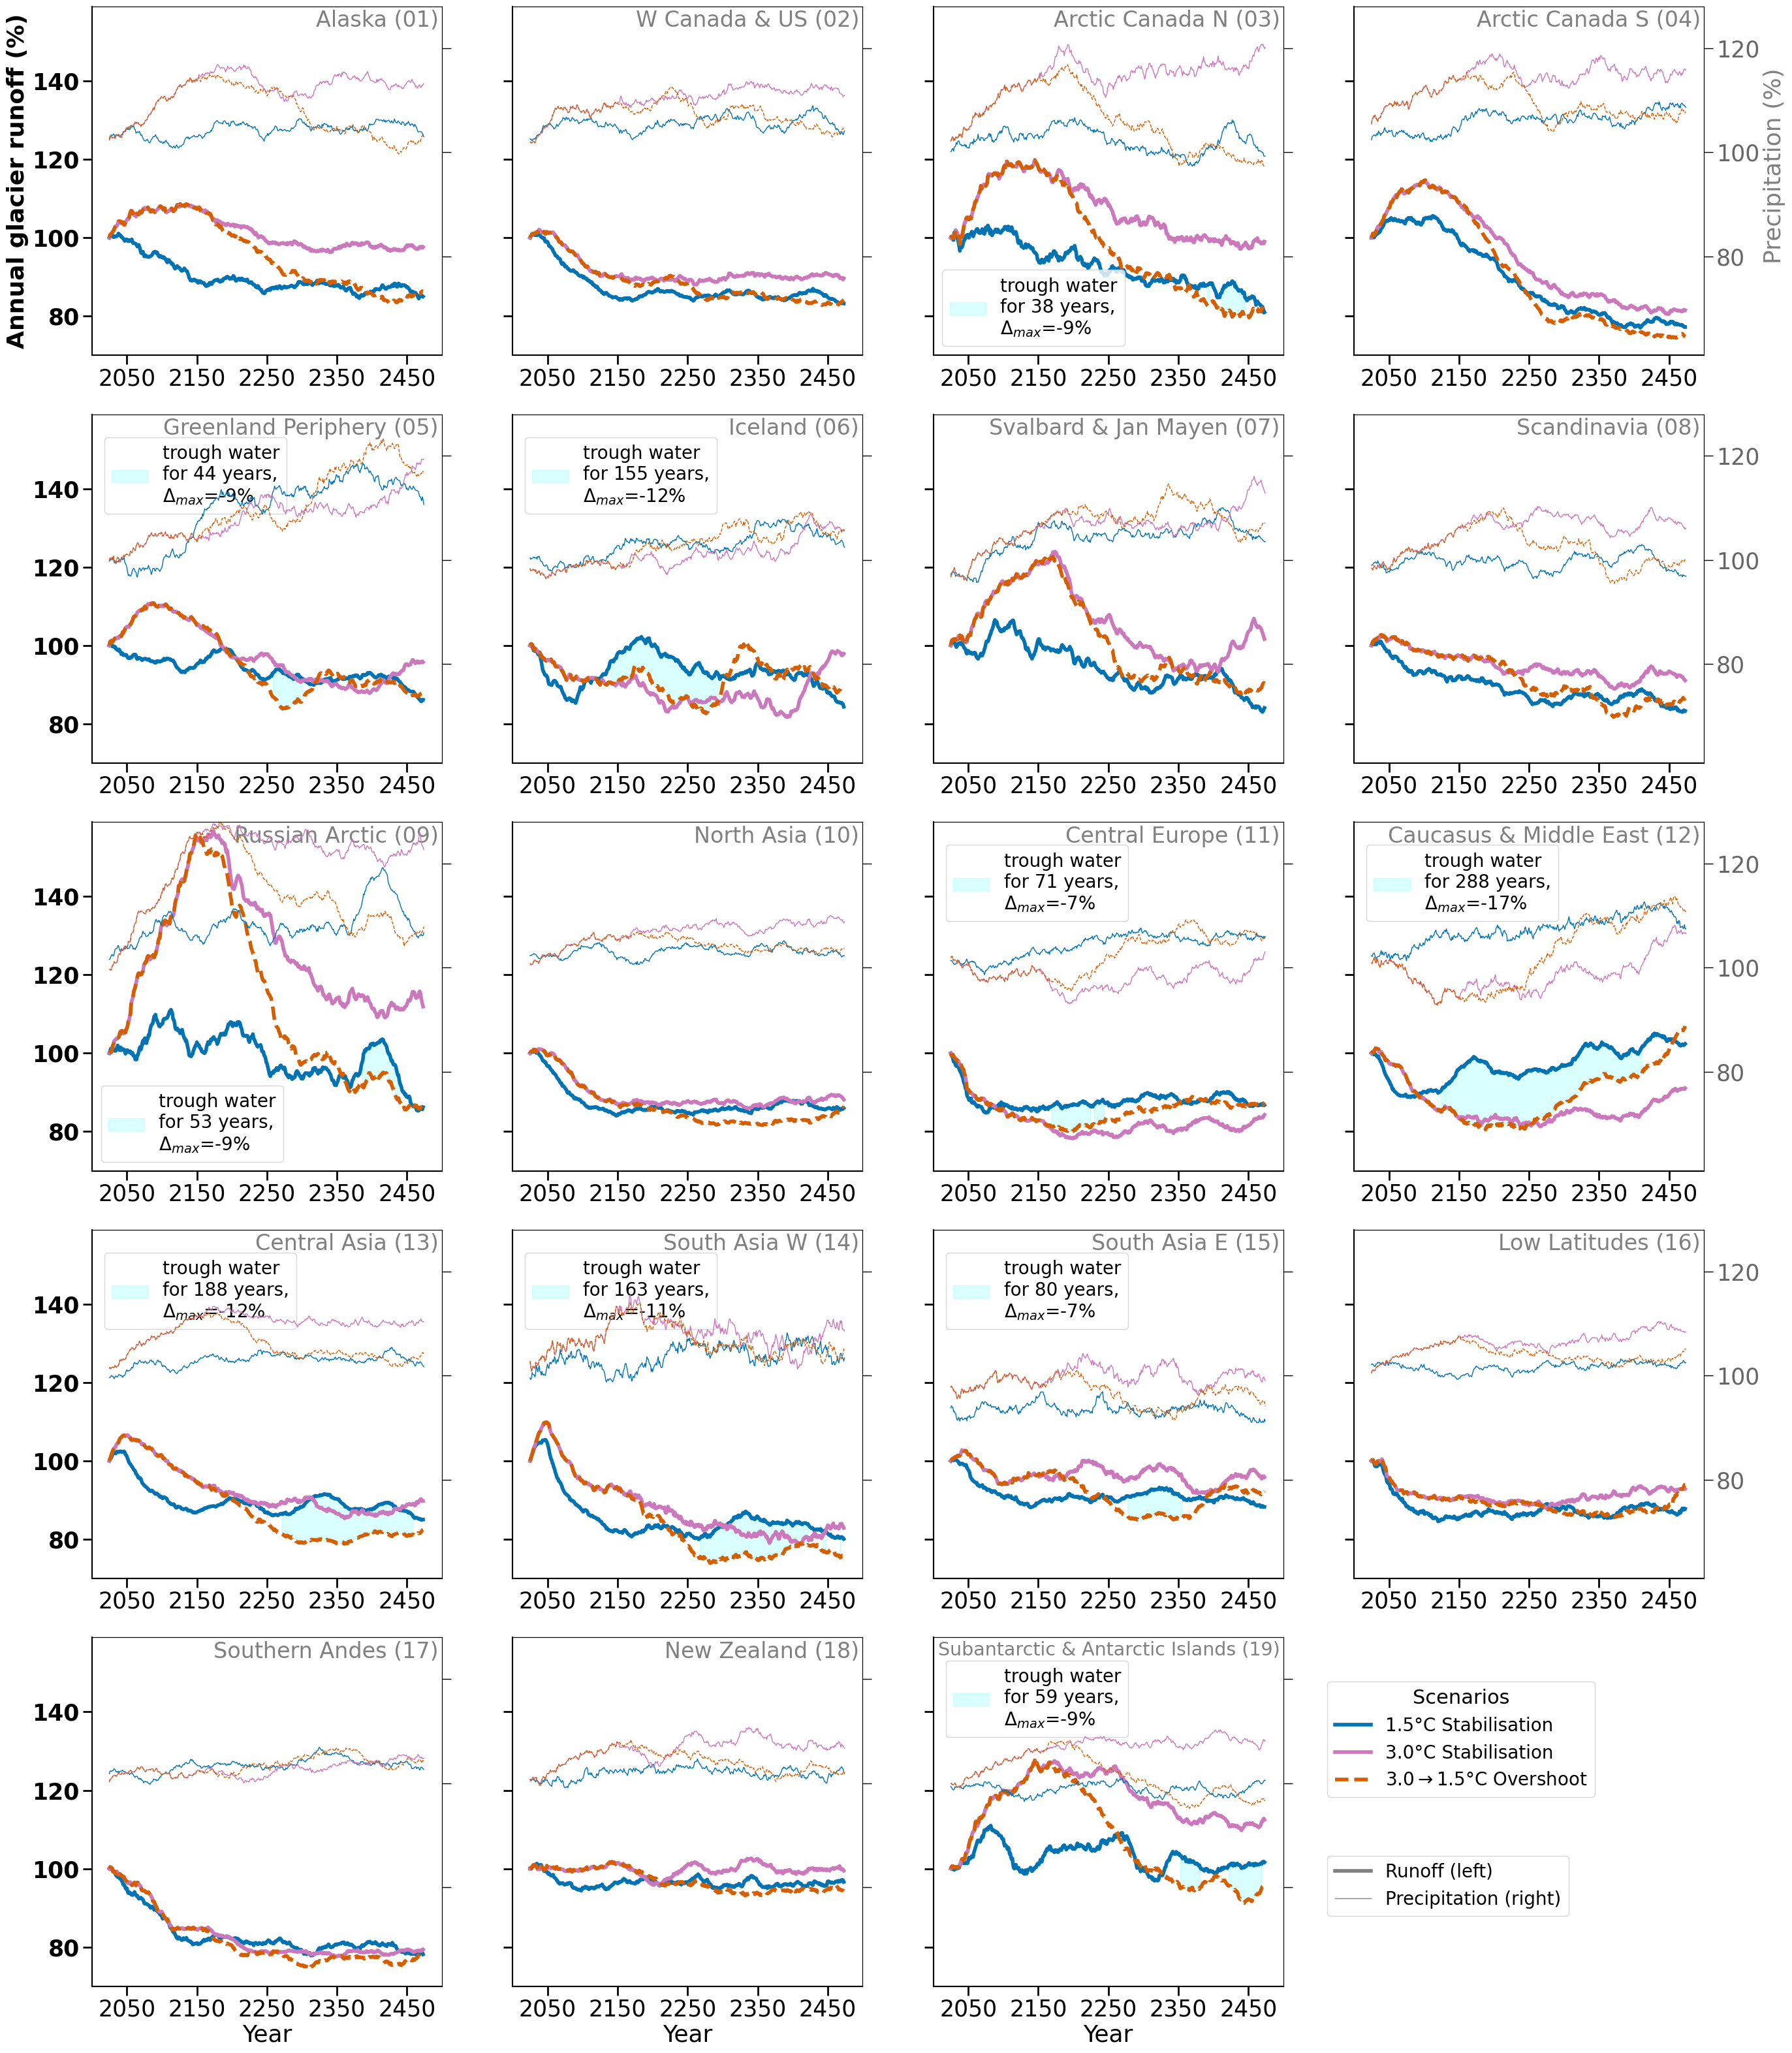

In [62]:
label_fs = 26
plt.rc('font', size=25)

var = 'precip_51yr_avg'
plt.figure(figsize=(28,32)) #, sharey=True, sharex=True)
for j, ri in enumerate(np.arange(1,20,1)):
    if ri<10:
        rgi_reg = f'0{ri}'
    else:
        rgi_reg = f'{ri}'
    pd_runoff_scenario_rel_reg_sel = pd_runoff_scenario_rel_reg.loc[pd_runoff_scenario_rel_reg.rgi_reg == rgi_reg]
    plt.subplot(5,4,ri)
    ax = plt.gca()
    ax2 = ax.twinx()  

    for scenario in scenarios:
        #ax.set_title('Globally')
        #plt.text(0.03,0.97, 'Globally',
        #         transform=ax.transAxes,ha='left',va='top',
        #         color='grey', fontsize=25)
        sns.lineplot(data=pd_runoff_scenario_rel_reg_sel.loc[pd_runoff_scenario_rel_reg_sel.scenario==scenario], 
                     x='time', y= 'runoff_rel_2000_2050_%', 
                     color=color_scenario_poster[scenario],
                     ls= scenario_ls[scenario],
                     lw=4, legend=True, ax = ax)

        pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
        pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == f'RGI{rgi_reg}_glacier']
        pd_clim_scenario_g.index = pd_clim_scenario_g.year
        temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
        var_g_to_ref = 100*pd_clim_scenario_g[var]/precip_ref_g

        ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 1, 
                     ls = scenario_ls[scenario],
                     lw=1, color = color_scenario[scenario], label=label_scenario_david[scenario])

    # overshoot runoff smaller than 0.95 times stabilisation runoff (both use 501r avg. runoff)
    sel_oversh = pd_runoff_scenario_rel_reg_sel.loc[pd_runoff_scenario_rel_reg_sel.scenario=='oversh_T30OS15']
    sel_stab = pd_runoff_scenario_rel_reg_sel.loc[pd_runoff_scenario_rel_reg_sel.scenario=='stab_T15']
    nyears, runoff_diff_trough, water_trough_min_yr, water_trough_max_diff, yrs_trough_pot_start_end = get_basin_trough_water_stats(sel_stab, sel_oversh, runoff_var ='runoff_rel_2000_2050_%')
    try:
        y0,y1 = yrs_trough_pot_start_end.split('_')
        sel_oversh.index = sel_oversh.time
        sel_stab.index = sel_stab.time
        water_trough_max_diff = np.round(float(water_trough_max_diff),0)
        add_label = f'for {int(nyears)} years,\n' + r'$\Delta_{max}$=-'+f'{int(water_trough_max_diff)}%'

        condi_5perc = (sel_oversh['runoff_rel_2000_2050_%']-sel_stab['runoff_rel_2000_2050_%']).loc[float(y0):float(y1)+1]<=-5
        # pd_basin_sel_oversh_T30OS15_runoff.loc[float(y0):float(y1)+1]['runoff_dry3m_rel_2000_2050_%'].where(condi_5perc)
        # important -> keep the NaNs to show the potential incontinuoties ... 
        ax.fill_between(sel_stab.loc[float(y0):float(y1)+1].time.where(condi_5perc),  
                         sel_stab.loc[float(y0):float(y1)+1]['runoff_rel_2000_2050_%'].where(condi_5perc), 
                         sel_oversh.loc[float(y0):float(y1)+1]['runoff_rel_2000_2050_%'].where(condi_5perc),
                         alpha = 0.15, color='cyan', zorder=-1, label='trough water\n'+add_label)
        handles_x, labels_x = ax.get_legend_handles_labels()
        if j in [2,8]:
            loc_leg3 = 'lower left'
            leg3 = ax.legend([handles_x[-1]], [labels_x[-1]], loc=loc_leg3,
                             fontsize=20)
        else:
            loc_leg3 = 'upper left'
            leg3 = ax.legend([handles_x[-1]], [labels_x[-1]], loc=loc_leg3,
                             bbox_to_anchor=(0.01,0.96),
                             fontsize=20)
    except AttributeError:
        pass
        
        
        
    ### ax
    if j>15:
        ax.set_xlabel('Year', fontsize=label_fs)
    else:
        ax.set_xlabel('')
    if j==0:
        ax.set_ylabel('Annual glacier runoff (%)', weight='bold', fontsize=label_fs)
    else:
        ax.set_ylabel('')
        
    if j in [0,4,8,12,16]:
        ax.set_yticks(ticks=np.arange(80,159,20),
                       labels=np.arange(80,159,20), weight='bold')
    else:
        ax.set_yticks(ticks=np.arange(80,159,20),
                       labels=np.arange(80,159,20), alpha = 0, fontsize=1)
    ax.set_ylim([70,159]);
    
    ax.set_xlim([2000,2500])
    ax.set_xticks([2050,2150,2250,2350,2450],[2050,2150,2250,2350,2450])
    for axis in 'left', 'bottom':
        ax.spines[axis].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', width=2, length=10,grid_alpha =0)

    # ax2
    ticks = np.arange(80,130,20)
    if j not in [3,7,11,15]:
        ax2.set_yticks(ticks=ticks,
                            labels=ticks, alpha=0, fontsize=1)
        plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)
    else:
        ax2.set_yticks(ticks=ticks,
                      labels=ticks,alpha = 0.6)
    
    ax2.set_ylim([61,128]);

    if j !=3:
        ax2.set_ylabel('')
    else:
        ax2.set_ylabel('    Precipitation (%)',color='grey', fontsize=label_fs)

    ax2.set_xlim([2000,2500])
    ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)
    
    if rgi_reg == '19':
        fs_reg = 20.5
    else:
        fs_reg = 24
    ax.text(0.99,0.99, d_reg_num_name[rgi_reg] + f' ({rgi_reg})',
             transform=ax.transAxes,ha='right',va='top',
             color='grey', fontsize=fs_reg)
plt.tight_layout()

handles_2, labels_2 = ax2.get_legend_handles_labels()
leg = ax.legend(handles_2[:len(scenarios)], 
                labels_2[:len(scenarios)], title='Scenarios', fontsize=20, title_fontsize=22, loc = 'upper left',
               bbox_to_anchor=(1.1,0.9))
for l in leg.get_lines():
    l.set_linewidth(4)
    
leg2 = ax.legend([handles_2[0], handles_2[0]], ['Runoff (left)',
                                              'Precipitation (right)'],
                 loc='upper left', ncol=1, fontsize=20,bbox_to_anchor=(1.1,0.4))
leg2.get_lines()[0].set_linewidth(4)
leg2.get_lines()[1].set_linewidth(1)
for l in leg2.get_lines():
    l.set_color('grey')
ax.add_artist(leg)
ax.add_artist(leg3)
plt.savefig('figures/suppl_RGIreg_runoff_prcp.pdf')

In [ ]:
df_scenario = xr.open_dataset(f'common_running_sum_all_rgi_reg_oversh_stab_2000_2500_bc_1980_2019.nc')
color_scenario_all_oversh = {'stab_T12': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'stab_T15': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'oversh_T20OS15': (0.33725490196078434,
  0.7058823529411765,
  0.9137254901960784),
 'oversh_T25OS15': (0.8705882352941177,
  0.5607843137254902,
  0.0196078431372549),
 'oversh_T30OS15': (0.8352941176470589, 0.3686274509803922, 0.0),
 'stab_T30': (0.8, 0.47058823529411764, 0.7372549019607844)}
'_all_overshoots'

var = 'temp_21yr_avg'


plt.rc('font', size=25)
portrait = True
pd_vol_scenario_rel = (100*df_scenario/df_scenario.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()
df_scenario_glob = df_scenario.sum(dim='rgi_reg')
pd_vol_scenario_glob = (100*df_scenario_glob/df_scenario_glob.sel(time=2020)).volume.to_dataframe('volume_rel_2020_%').reset_index()

for a,color_scenarios in
    scenarios = color_scenarios.keys()
    paletti = list(color_scenarios.values())  
    if portrait:
        plt.figure(figsize=(28,32)) #, sharey=True, sharex=True)
        plt.subplot(5,4,20)
    else:
        plt.figure(figsize=(45,16)) #, sharey=True, sharex=True)
        plt.subplot(2,7,1)
    ax = plt.gca()
    #ax.set_title('Globally')
    #plt.text(0.03,0.97, 'Globally',
    #         transform=ax.transAxes,ha='left',va='top',
    #         color='grey', fontsize=25)
    sns.lineplot(data=pd_vol_scenario_glob.loc[pd_vol_scenario_glob.bias_correction=='bc_1980_2019'],
                 hue='scenario', x='time', y= 'volume_rel_2020_%', 
                 palette=paletti,
                 hue_order=scenarios,lw=0, legend=True,
                 ax = ax)

    #ax.set_xlabel('Year')
    #ax.grid(axis='x')
    ax.set_ylim([-2,165]);
    ax.set_yticks(ticks=[0,25,50,75,100,125, 150],
                       labels=[0,25,50,75,100,125, 150], weight='bold', alpha = 0)

    for axis in 'left', 'bottom':
        ax.spines[axis].set_linewidth(1.5)

    # set the parameters for both axis: label size in font points, the line tick line 
    # width and length in pixels
    ax.tick_params(axis='both', which='major', width=2, length=10,grid_alpha =0)
    ax2 = ax.twinx()  
    for scenario in scenarios:

        pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
        pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
        pd_clim_scenario_g.index = pd_clim_scenario_g.year
        temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
        var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

        ax2.plot(pd_clim_scenario_g.year,
                 var_g_to_ref,
                 alpha = 0.6, 
                 ls = scenario_ls_more_os[scenario],
                 lw=0, color = color_scenario[scenario], label=label_scenario_david_more_os[scenario])
    ax2.set_ylabel('')
    ax2.set_yticks(ticks=[0,1,2,3,4,5],
                   labels=[0,1,2,3,4,5], alpha=0)
    ax2.set_ylim([-0.9,5.9]);

    plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)
    ax.set_xlabel('')
    ax.set_xlim([2000,2500])
    ax2.set_xlim([2000,2500])
    ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0)
    ax.set_xticks([2050,2150,2250,2350,2450],[2050,2150,2250,2350,2450])

    ### add legends
    handles, labels = ax.get_legend_handles_labels()
    for s, h in zip(scenarios, handles):
        if 'oversh' in s: 
            h.set_linestyle('--')

    ax.get_legend().remove()
    handles_2, labels_2 = ax2.get_legend_handles_labels()
    leg = ax.legend(handles[:len(scenarios)], labels_2[:len(scenarios)], #title='Scenarios',
                    fontsize=22.5, title_fontsize=25, bbox_to_anchor=(1,1), loc = 'upper right')
    for l in leg.get_lines():
        l.set_linewidth(4)
    leg2 = ax.legend([handles[0], handles_2[0]], ['Glacier mass (left)',
                                                  r'Temperature change $\Delta$T'+f'\n(right, near-glacier,\n glacier-area weighted)'],
                     loc='lower right', ncol=1, fontsize=22.5) #, bbox_to_anchor=(1,-0.05),)
    leg2.get_lines()[0].set_linewidth(4)
    leg2.get_lines()[1].set_linewidth(2)
    for l in leg2.get_lines():
        l.set_color('black')
    ax.add_artist(leg)
    
    ax.set_ylabel('')
    ax.set_yticks(ticks=[0,25,50,75,100,125, 150],
                       labels=[0,25,50,75,100,125, 150], alpha=0, fontsize=1)
    ax.set_axis_off()
    ax2.set_axis_off()
    perc_init_l = []
    for j, pi in enumerate(np.arange(1,20,1)):
        if pi<10:
            Preg = f'0{pi}'
        else:
            Preg = f'{pi}'
        if portrait:
            plt.subplot(5,4,j+1)
            x_j = np.arange(0,19,4)
            x2_j = np.arange(3,19,4)
            year_xlabel_condi = j>15

        else:
            plt.subplot(2,7,j+1)
            x_j = [6]
            x2_j = [5,12]
            year_xlabel_condi = j>5
        
        ax = plt.gca()

        pd_vol_scenario_rel_reg = pd_vol_scenario_rel.loc[pd_vol_scenario_rel.rgi_reg==Preg]
        sns.lineplot(data=pd_vol_scenario_rel_reg.loc[(pd_vol_scenario_rel_reg.bias_correction=='bc_1980_2019') & 
                                                     (pd_vol_scenario_rel_reg.scenario!='oversh_T20OS15') & 
                                                     (pd_vol_scenario_rel_reg.scenario!='oversh_T25OS15') & 
                                                     (pd_vol_scenario_rel_reg.scenario!='oversh_T30OS15') 
                                                     ],
                     hue='scenario', x='time', y= 'volume_rel_2020_%', 
                     palette=paletti,
                 hue_order=scenarios,lw=4, legend=False,
                 ax = ax)
        sns.lineplot(data=pd_vol_scenario_rel_reg.loc[(pd_vol_scenario_rel_reg.bias_correction=='bc_1980_2019') & 
                                                     ((pd_vol_scenario_rel_reg.scenario=='oversh_T20OS15') | 
                                                     (pd_vol_scenario_rel_reg.scenario=='oversh_T25OS15') |
                                                     (pd_vol_scenario_rel_reg.scenario=='oversh_T30OS15')) 
                                                     ],
                     hue='scenario', x='time', y= 'volume_rel_2020_%', 
                     ls = '--',
                     palette=paletti,
                 hue_order=scenarios,lw=4, legend=False,
                 ax = ax)
        sns.lineplot(data=pd_vol_scenario_rel_reg.loc[(pd_vol_scenario_rel_reg.bias_correction=='bc_1980_2019')
                                                   #& (pd_vol_scenario_glob.scenario != 'oversh_T30OS15') 
                                                   & (pd_vol_scenario_rel_reg.time<2020)],
                 x='time', y= 'volume_rel_2020_%', 
                 color='black',
                 #alpha = alpha,
                 #palette=stabs_col,
                 #hue_order=stabs,
                 lw=4, legend=False,
                 ax = ax)
        #ax.set_title(f'{Preg}')
        plt.text(0.03,0.97, Preg,
                 transform=ax.transAxes,ha='left',va='top',
                 color='grey', fontsize=26)
        if Preg == '19':
            fs_reg = 21
        else:
            fs_reg = 24
        plt.text(0.99,0.99, d_reg_num_name[Preg],
                 transform=ax.transAxes,ha='right',va='top',
                 color='grey', fontsize=fs_reg)
        ax.set_yticks(ticks=[0,25,50,75,100,125,150],
                       labels=[0,25,50,75,100,125,150], weight='bold')
        if j in x_j:
            #plt.ylabel(f'Volume (% relative to 2020)', weight='bold')
            plt.ylabel('')
            ax.set_yticks(ticks=[0,25,50,75,100,125,150],
                       labels=[0,25,50,75,100,125,150], weight='bold')
        else:
            plt.ylabel('')
            ax.set_yticks(ticks=[0,25,50,75,100,125, 150],
                       labels=[0,25,50,75,100,125, 150], alpha=0, fontsize=1) #visible=False) 
            #plt.setp(ax.get_yticklabels(), visible=False)

        ax.set_ylim([-2,165]);
        ax.tick_params(axis='both', which='major', width=2.5, length=10)
        ax2 = ax.twinx()  
        for scenario in scenarios:
                        #'stab_T30']:

            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenario]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == f'RGI{Preg}_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            ax2.plot(pd_clim_scenario_g.year,
                     var_g_to_ref,
                     alpha = 0.6, 
                     ls = scenario_ls_more_os[scenario],
                     lw=1, color = color_scenario[scenario], label=label_scenario_david_more_os[scenario])

        ax2.set_yticks(ticks=[0,1,2,3,4,5],
                   labels=[0,1,2,3,4,5], alpha=0.6)
        if j in x2_j:
            if j == 3: 
                ax2.set_ylabel(r'$\Delta$T'+'(°C) rel. to 2000-2019', #\n(glacier-area weighted)',
                              alpha = 0.6)
            else:
                ax2.set_ylabel('')
            #ax2.set_yticks(labels=[0,1,2,3,4], alpha=0.6)
        else:
            ax2.set_ylabel('')
            #ax2.set_yticks([])
            plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)

        ax2.set_ylim([-0.9,5.9]);
        if year_xlabel_condi:
            ax.set_xlabel('Year')
        else:
            ax.set_xlabel('')
        if j ==15:
            ax15 = ax
        ax.set_xlim([2000,2500])
        ax.set_xticks([2050,2150,2250,2350,2450],[2050,2150,2250,2350,2450])
        ax2.set_xlim([2000,2500])
        ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)  
        if j == 0:
            ax.set_ylabel('Mass (%, rel. to 2020)', weight='bold')
            
        _init = df_scenario.volume.sel(time=2020).sel(rgi_reg=Preg).mean()
        init = _init.mean()
        #init = init_sel_sum.mean() #df_scenario_common_cluster.sel(time=2020).mean() # all 8 scenarios are anyways equal (as we use here the non-rolling average!!!)
        assert (_init.std()/init).values <1e-3
        init_all = df_scenario.volume.sel(time=2020).sum(dim='rgi_reg').mean()  # make sure to use here the non-rolling average
        #df_scenario_common.sel(time=2020).sum(dim='rgi_reg').volume.mean()
        perc_init = np.round(100*init/init_all,2).values
        perc_init_l.append(perc_init)
        #tt = tt + f'\n{perc_init}% initially rel. to global' 
        tt = f'{perc_init}% of global' 

        #if c in [10]:
        #    if c==4:
        #        fs=7
        #    else:
        #        fs=7
        #    ax.text(2015,5, tt , va='bottom', fontsize=fs, ha='left', color=cols[c], backgroundcolor=bc, fontweight='bold', zorder=0)
        #else:
        ax.text(0.97,0.90, tt, 
                transform=ax.transAxes,ha='right',va='top', fontsize=18, color='black',
                backgroundcolor='silver') #, fontweight='bold')
    #np.array(perc_init_l).sum()
    # check if we get to 100
    np.testing.assert_allclose(np.array(perc_init_l).sum() , 100, rtol = 1e-2)
    plt.tight_layout()
    ax15.set_xlabel('Year')



In [ ]:
    if portrait:
        plt.savefig(f'figures/2_rgi_reg_volume_changes_overshoot{a}_{bc}_portrait_4cols.pdf')
        plt.savefig(f'figures/2_rgi_reg_volume_changes_overshoot{a}_{bc}_portrait_4cols.png')

    else:
        plt.savefig(f'figures/2_rgi_reg_volume_changes_overshoot{a}_{bc}.pdf')
